In [ ]:
import pandas as np
a=np.read_csv("/content/Carseats.csv")
print(a)

     Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US  
0          

In [ ]:
a.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
b=LabelEncoder()
a["Sales"]=b.fit_transform(a["Sales"])
a["CompPrice"]=b.fit_transform(a["CompPrice"])
a["Income"]=b.fit_transform(a["Income"])
a["Advertising"]=b.fit_transform(a["Advertising"])
a["Population"]=b.fit_transform(a["Population"])
a["Price"]=b.fit_transform(a["Price"])
a["ShelveLoc"]=b.fit_transform(a["ShelveLoc"])
a["Age"]=b.fit_transform(a["Age"])
a["Education"]=b.fit_transform(a["Education"])
a["Urban"]=b.fit_transform(a["Urban"])
a["US"]=b.fit_transform(a["US"])

In [ ]:
print(a)

     Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  Education  Urban  US
0      255         49      51           11         141     54          0   17          7      1   1
1      297         22      27           16         129     18          1   40          0      1   1
2      267         24      14           10         138     15          2   34          2      1   1
3      158         28      77            4         249     31          2   30          4      1   1
4       37         52      42            3         178     62          0   13          3      1   0
..     ...        ...     ...          ...         ...    ...        ...  ...        ...    ...  ..
395    320         49      85           17         104     62          1    8          4      1   1
396    114         50       2            3          17     54          2   30          1      0   1
397    159         71       5           12         195     91          2   15          8      1   1


(array([[18.,  5.,  4.,  7.,  3.,  1.,  2.,  0.,  1.,  0.],
        [22.,  3.,  5.,  4.,  5.,  4.,  2.,  0.,  0.,  0.],
        [11.,  7.,  4.,  7.,  4.,  2.,  1.,  1.,  0.,  0.],
        [15.,  1.,  3.,  5.,  1.,  4.,  3.,  0.,  0.,  0.],
        [20.,  5.,  4.,  9.,  9.,  4.,  2.,  1.,  0.,  1.],
        [19.,  5.,  3.,  5.,  7.,  2.,  3.,  0.,  2.,  0.],
        [15.,  7.,  5., 10.,  3.,  3.,  0.,  0.,  0.,  0.],
        [17.,  9.,  2.,  2.,  3.,  3.,  1.,  1.,  0.,  0.],
        [13.,  0.,  1.,  3.,  6.,  2.,  3.,  1.,  0.,  0.],
        [11.,  3.,  3.,  5.,  6.,  4.,  1.,  1.,  0.,  0.]]),
 array([ 21. ,  30.9,  40.8,  50.7,  60.6,  70.5,  80.4,  90.3, 100.2,
        110.1, 120. ]),
 array([ 0. ,  2.9,  5.8,  8.7, 11.6, 14.5, 17.4, 20.3, 23.2, 26.1, 29. ]),
 <matplotlib.collections.QuadMesh at 0x7d88bfd8afd0>)

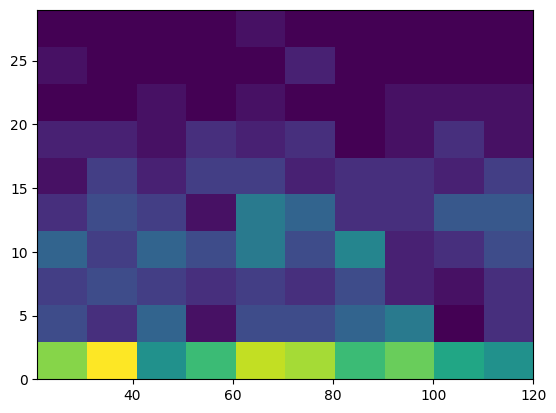

In [3]:
from matplotlib import pyplot as plt
plt.hist2d(a["Income"],a["Advertising"])

In [ ]:
x=a.drop("ShelveLoc",axis=1)
y=a["ShelveLoc"]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.02)
print(xtrain)
print(ytrain)

     Sales  CompPrice  Income  Advertising  Population  Price  Age  Education  Urban  US
340    164         51       8            0          55     25   18          6      1   0
150    280         33      62            8          90     48   32          0      0   1
376    335         52      38           19         165     26   19          1      1   1
326     55         44       9            0          80     56   28          7      1   0
66     227         38      69            0         273     25   31          8      1   0
..     ...        ...     ...          ...         ...    ...  ...        ...    ...  ..
185    268         41      77           11         241     41   39          0      1   1
81     165         27      50            0         119     62   45          3      1   0
329    298         12      32            9         233     23   20          2      1   1
258     24         19      17            0         127     16   47          4      0   0
13     291         26

In [ ]:
from sklearn.linear_model import LogisticRegression
br=LogisticRegression()
br.fit(xtrain,ytrain)
ypred=br.predict(xtrain)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
data=br.predict([[50,100,30,453,120,100,0,30,19,0]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
print(data)

[0]


In [ ]:
from sklearn.metrics import confusion_matrix
ypred=br.predict(xtest)
print(confusion_matrix(ytest,ypred))


[[1 0 2]
 [0 1 0]
 [1 0 3]]


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,ypred))

0.625


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       1.00      1.00      1.00         1
           2       0.60      0.75      0.67         4

    accuracy                           0.62         8
   macro avg       0.70      0.69      0.69         8
weighted avg       0.61      0.62      0.61         8

